<a href="https://colab.research.google.com/github/everest8849top/LinearRegression/blob/main/problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
# dataset = pd.read_csv('/kaggle/input/freecodecamp-health-costs-insurance/health-costs/insurance.csv')

--2023-10-16 14:25:47--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2023-10-16 14:25:48 (12.6 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [3]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

X = dataset.drop('expenses', axis = 1)
y = dataset['expenses']

scaler = StandardScaler()
X = scaler.fit_transform(X)

train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()

from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, verbose=1, mode='auto', restore_best_weights=True)
#model.fit(train_dataset, train_labels, epochs=10, batch_size=32, validation_split=0.2)
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=10000)



Epoch 1/10000
34/34 - 6s - loss: 322425344.0000 - mae: 13345.1826 - mse: 322425344.0000 - val_loss: 323371744.0000 - val_mae: 12966.4277 - val_mse: 323371744.0000 - 6s/epoch - 170ms/step
Epoch 2/10000
34/34 - 0s - loss: 322362688.0000 - mae: 13343.0537 - mse: 322362688.0000 - val_loss: 323295936.0000 - val_mae: 12963.8994 - val_mse: 323295936.0000 - 159ms/epoch - 5ms/step
Epoch 3/10000
34/34 - 0s - loss: 322271520.0000 - mae: 13340.0635 - mse: 322271520.0000 - val_loss: 323186336.0000 - val_mae: 12960.4062 - val_mse: 323186336.0000 - 167ms/epoch - 5ms/step
Epoch 4/10000
34/34 - 0s - loss: 322136128.0000 - mae: 13335.8584 - mse: 322136128.0000 - val_loss: 323023808.0000 - val_mae: 12955.4609 - val_mse: 323023808.0000 - 154ms/epoch - 5ms/step
Epoch 5/10000
34/34 - 0s - loss: 321949344.0000 - mae: 13330.1846 - mse: 321949344.0000 - val_loss: 322808160.0000 - val_mae: 12949.0869 - val_mse: 322808160.0000 - 143ms/epoch - 4ms/step
Epoch 6/10000
34/34 - 0s - loss: 321701184.0000 - mae: 13322.

9/9 - 0s - loss: 20728254.0000 - mae: 2730.9783 - mse: 20728254.0000 - 38ms/epoch - 4ms/step
Testing set Mean Abs Error: 2730.98 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


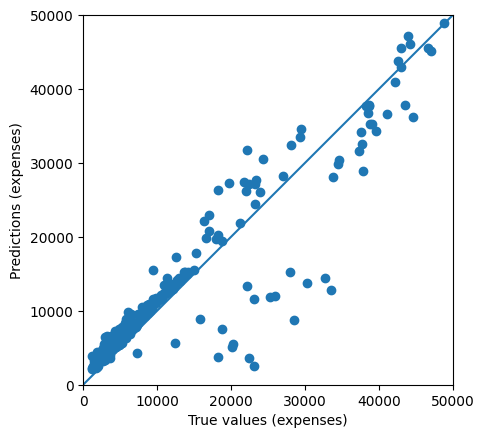

In [4]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
